# Introduction

In this project, I will analyze text that was scrapped from twitter that I did in: [Twitter Scrapping with Python](https://github.com/teguhsam/twitter_scraping_with_PYTHON).

# Import Text

In [1]:
import json
with open('tweets_1000.json') as json_file:
    json_text = json.load(json_file)

print(type(json_text))

<class 'list'>


In [2]:
json_text[0:3]

['RT @SBSNews: The Morrison government is set to adopt a technology investment target instead of signing up to a global agreement to achieve…',
 '@ColinCowherd im for steroids and using technology to steal signs',
 "@peachpanini of course we'd have the technology to show them on a reasonable scale via your tv/computer monitor. think of the possibilities"]

# Tokenize Text

Resource: https://machinelearningmastery.com/clean-text-machine-learning-python/

## Tokenize into words

In [3]:
from nltk.tokenize import word_tokenize

## Create an empty list for

In [4]:
token_words_list = list()

## Tokenize into words

In [5]:
for index, tweet in enumerate(json_text):
    tokenized_words = word_tokenize(json_text[index])
    token_words_list.extend(tokenized_words)

In [6]:
len(token_words_list)

23997

# Clean words

To analyze the text above, cleaning needs to be done to remove punctuations such as @,#,! etc. Stopwords such as: we, you, and, they are common words that are also need to be removed.

## Remove punctuation

In [7]:
token_punc_removed = list()

In [8]:
for word in token_words_list:
    if word.isalpha():
        # before appending the word, put the word in a lower case
        token_punc_removed.append(word.lower())

In [9]:
len(token_punc_removed)

16843

## Remove Stopwords other common words

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/MBAN/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def remove_selected_words(target_list, word_to_remove_list):
    """
    This function takes a list of words to be remove and a list containing target words
    and return a list of 'clean words'
    
    """
    word_set = set(word_to_remove_list)
    clean_list = list()
    
    for word in target_list:
        if word not in word_to_remove_list:
            clean_list.append(word)
            
    return(clean_list)

In [12]:
stop_words_list = stopwords.words('english')

In [13]:
token_stopwords_removed = remove_selected_words(token_punc_removed, 
                                                stop_words_list)


print("After Stopwords were removed, there are : {} remaining".format(len(token_stopwords_removed)))

After Stopwords were removed, there are : 10941 remaining


In [29]:
word_to_remove = ['rt', 'https']
token_common_removed = remove_selected_words(token_stopwords_removed, word_to_remove)

# Analyze words

## Create a function to count words

In [14]:
def count_word_occurance(word_list):
    """This function take an unsorted list of words, 
    count the word occurance, 
    store the count in a dataframe(sorted by frequency)"""
    
    from collections import Counter
    import pandas as pd
    
    counts = Counter(word_list)
    counts_df = pd.DataFrame.from_dict(counts, 
                                       orient='index', 
                                       columns=['count']).sort_values(by='count', 
                                                                      ascending=False)
    return(counts_df)

## Find 10 most popular words

In [30]:
count_word_occurance(token_common_removed).head(10)

,count
technology,276
put,90
farmer,83
intelligence,80
bloomberg,77
anyone,74
farmers,71
teach,64
data,64
new,63


## Lemmatize

We can see above that 'farmer' and 'farmers' are considered two different words. Lets Lemmatize!

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

In [31]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Instantiate Lemmatizer
wnl = WordNetLemmatizer()

#Example
wnl.lemmatize('farmers')

[nltk_data] Downloading package wordnet to /Users/MBAN/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'farmer'

In [32]:
word_lemmatized_list = list()
for word in token_common_removed:
    w = wnl.lemmatize(word)
    word_lemmatized_list.append(w)

In [33]:
count_word_occurance(word_lemmatized_list).head(10)

,count
technology,282
farmer,154
put,90
intelligence,80
bloomberg,77
anyone,74
teach,66
data,64
new,63
say,61


# Wordcloud

https://github.com/amueller/word_cloud

## Install Wordcloud

In [22]:
!pip3 install wordcloud

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## List to Text function

In order to work with the world cloud, the lists we have been using to process words need to be converted
into string because wordcloud only take string input

In [40]:
def list_to_text(list_of_words):
    """
    This function take a list and concatenate every word in the list into a long string
    """
    
    text = ""
    
    for word in list_of_words:
        
        text = text + " " + word
    
    return(text)

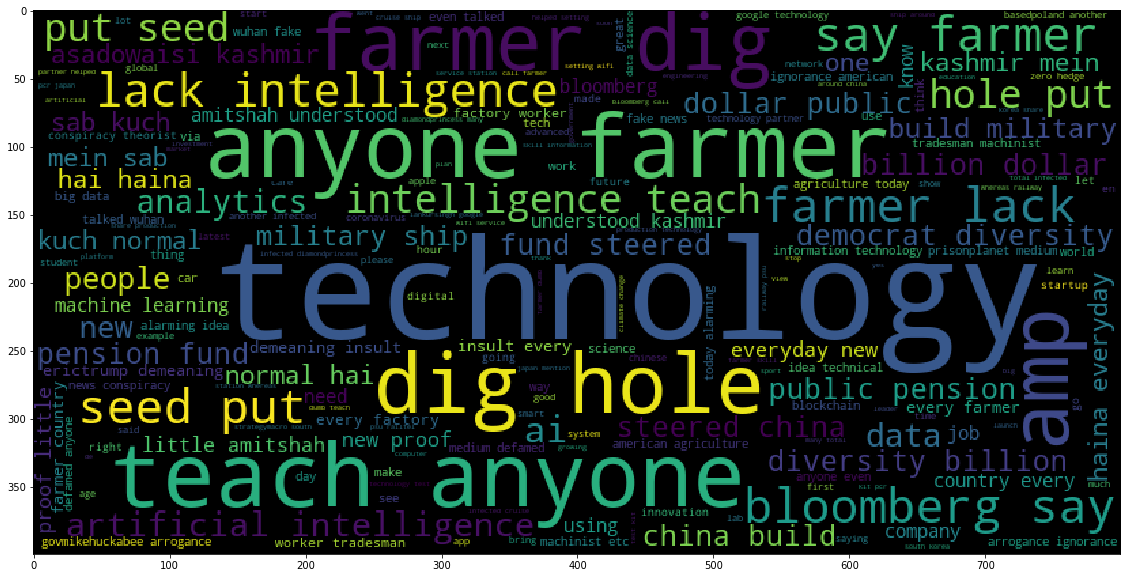

In [43]:
wordcloud = WordCloud(width=800, height=400).generate(list_to_text(word_lemmatized_list))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show()